<a href="https://colab.research.google.com/github/ara42/Machine-Learning/blob/main/%EA%B5%B0%EC%A7%91%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
def distance(x1,x2):
    return sum((x1-x2)**2)**(1/2)

In [2]:
import numpy as np

In [3]:
na1 = np.array([1,2])
na2 = np.array([5,5])
print(distance(na1,na2))

5.0


In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [5]:
def kmeans(data,k=3):
    #초기에 k개의 중심저을 구하라
    cis = np.random.choice(range(len(data)),k)
    centers = np.random.choice(data,k)
    cs = {} #클러스터 사전
    #반복
    while True:
        cs = {} #클러스터 사전

        #모든 데이터를 k개의 중심점에서 거리를 계산한다.
        for d in data:
            dis = np.array([distance(d,center) for center in centers])
            ai = np.argmin(dis) #최소 거리의 인덱스

            #가장 가까운 중심점에 속한 그룹에 속하게 한다.
            if ai not in cs: #이미 존재하는 그룹일 때
                cs[ai] = [] #새로운 그룹을 사전에 생성하여 보관
            cs[ai].append(d) #해당 그룹에 데이터를 속하게 한다.

        #새로운 중심점을 계산한다.
        ncenters = []
        for i in range(k):
            xdata = [x for x,_ in cs[i]]
            ydata = [x for x,_ in cs[i]]
            ncenters.append(xdata.mean(), ydata.mean())

        #조건(기존 중심점과 새로운 중심점이 같으면)
        if np.array_equal(centers,ncenters):
            break #반복문을 탈출하시오.
        centers = ncenters
    return cs

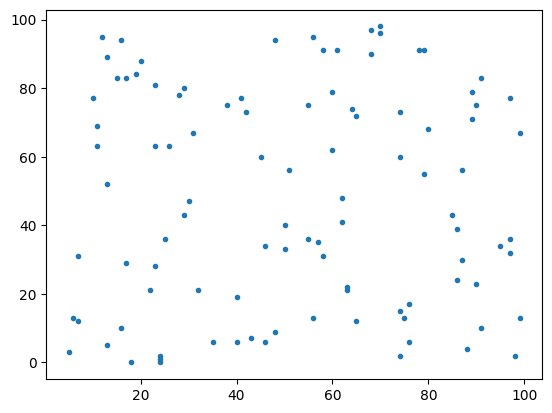

In [9]:
n = 100
data = np.array([[np.random.randint(0,100), np.random.randint(0,100)] for _ in range(n)])
plt.plot(data[:,0],data[:,1],'.')
plt.show()

In [11]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

In [12]:
iris = load_iris()
data = iris.data
label = iris.target

In [13]:
model = KMeans(n_clusters=3)
model.fit(data)
print(model.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
np.unique()

In [14]:
df = pd.DataFrame()
df['target'] = label
df['label'] = model.labels_

In [15]:
df.groupby(['target','label'])['label'].count()

target  label
0       1        50
1       0        48
        2         2
2       0        14
        2        36
Name: label, dtype: int64

In [19]:
from sklearn.datasets import make_blobs

In [20]:
data,label = make_blobs(n_samples=200, n_features=2, centers=3)

In [21]:
data.shape, label.shape

((200, 2), (200,))

In [22]:
np.unique(label,return_counts=True)

(array([0, 1, 2]), array([67, 67, 66]))

In [35]:
df = pd.DataFrame(data,columns=['f1','f2'])
df['target'] = label
df['label'] = model.labels_
df.groupby(['target','label'])['label'].count()

target  label
0       2        67
1       0        67
2       1        66
Name: label, dtype: int64

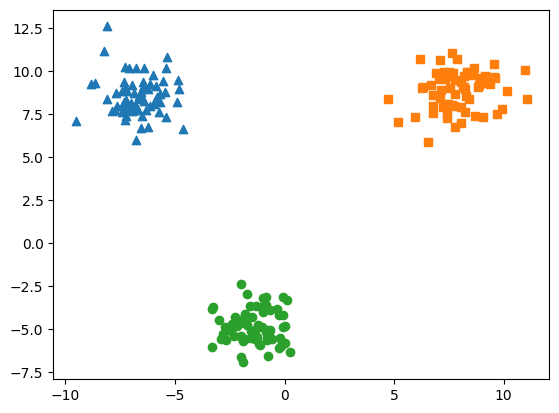

In [36]:
markers = ['^','s','o']
for i, marker in enumerate(markers):
    f_i = df['label'] == i #품종별로 필터링
    df_i = df[f_i] #특정 품종만 추출
    plt.scatter(df_i['f1'],df_i['f2'],marker=marker)
plt.show()

In [26]:
model = KMeans(n_clusters=3)
model.fit(data)
print(model.labels_)
print(label)

[1 2 2 0 1 1 2 1 2 2 0 2 0 0 1 0 2 1 0 2 0 0 2 1 0 2 2 2 2 2 2 1 2 1 0 2 0
 2 2 2 1 0 0 2 0 2 0 1 2 1 2 2 1 0 1 0 1 2 0 1 1 0 0 0 0 0 1 2 0 0 1 2 2 2
 2 1 1 1 2 0 1 0 2 0 1 0 0 2 2 0 0 0 2 1 0 0 1 2 2 0 2 2 2 2 2 2 1 1 0 2 0
 0 1 0 2 1 2 0 2 0 1 2 1 2 1 0 2 1 1 0 1 2 0 1 0 2 2 1 0 1 1 2 0 0 1 1 1 1
 1 1 1 1 0 0 1 1 1 1 2 0 0 1 0 1 1 2 0 2 0 1 2 0 1 0 2 0 2 0 2 2 2 0 2 1 1
 0 2 1 0 1 0 1 1 1 1 0 1 0 0 2]
[2 0 0 1 2 2 0 2 0 0 1 0 1 1 2 1 0 2 1 0 1 1 0 2 1 0 0 0 0 0 0 2 0 2 1 0 1
 0 0 0 2 1 1 0 1 0 1 2 0 2 0 0 2 1 2 1 2 0 1 2 2 1 1 1 1 1 2 0 1 1 2 0 0 0
 0 2 2 2 0 1 2 1 0 1 2 1 1 0 0 1 1 1 0 2 1 1 2 0 0 1 0 0 0 0 0 0 2 2 1 0 1
 1 2 1 0 2 0 1 0 1 2 0 2 0 2 1 0 2 2 1 2 0 1 2 1 0 0 2 1 2 2 0 1 1 2 2 2 2
 2 2 2 2 1 1 2 2 2 2 0 1 1 2 1 2 2 0 1 0 1 2 0 1 2 1 0 1 0 1 0 0 0 1 0 2 2
 1 0 2 1 2 1 2 2 2 2 1 2 1 1 0]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [33]:
df = pd.DataFrame(data,columns=['f1','f2'])
df['target'] = label
df['label'] = model.labels_
df.groupby(['target','label'])['label'].count()

target  label
0       2        67
1       0        67
2       1        66
Name: label, dtype: int64

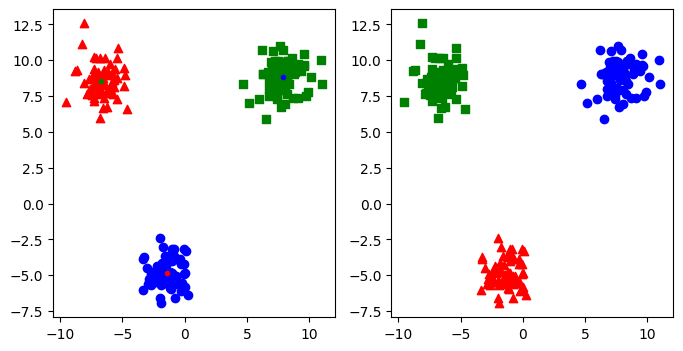

In [40]:
markers =['^','s','o']
colors = ['r','g','b']
c_colors = ['g','b','r']
_,axes = plt.subplots(ncols=2,figsize=(8,4))
for i,marker in enumerate(markers):
    f_i = df['label']==i
    df_i = df[f_i]
    axes[0].scatter(df_i['f1'],df_i['f2'],marker=marker,color=colors[i])
    center = model.cluster_centers_[i]
    axes[0].plot(center[0],center[1],color=c_colors[i],marker='.')

    f_i = df['target']==i
    df_i = df[f_i]
    axes[1].scatter(df_i['f1'],df_i['f2'],marker=marker,color=colors[i])
    center = model.cluster_centers_[i]
    axes[1].plot(center[0],center[1],color=c_colors[i],marker='.')

plt.show()

In [41]:
from sklearn.metrics import silhouette_score, silhouette_samples

In [46]:
data = iris.data
label = iris.target
ss = silhouette_samples(data,label)
ss.mean()

0.5034774406932961

In [47]:
model = KMeans(n_clusters=3)
model.fit(data)
ss2 = silhouette_samples(data,model.labels_)
ss2.mean()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.5528190123564095

In [48]:
df = pd.DataFrame(data,columns=iris.feature_names)
df['target'] = label
df['label'] = model.labels_
df['ss_t'] = ss
df['ss_l'] = ss2

In [49]:
df.groupby('label')['ss_l'].mean()

label
0    0.417320
1    0.798140
2    0.451105
Name: ss_l, dtype: float64